# #4
Для системы заданной своей передаточной функцией: 
$$W(s) = \frac{k(s+1)(s+10)}{s} = k\frac{M(s)}{N(s)}$$
построить корневые траектории.

1) Воспользуемся готовыми средствами (модуль control для Python)

In [1]:
import numpy, matplotlib.pyplot, control

def W(k):
    return control.tf([k, 11*k, 10*k], [1, 0]);

print(W(1))


s^2 + 11 s + 10
---------------
       s



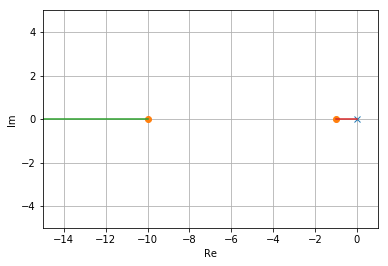

In [2]:
control.root_locus(W(1))
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-15, 1, -5, 5])
matplotlib.pyplot.xlabel('Re')
matplotlib.pyplot.ylabel('Im')
matplotlib.pyplot.show()

2) Определим корневые траектории непосредственным  образом:
$$\Phi(s) = \frac{W(s)}{1 + W(s)} = \frac{kM(s)}{N(s) + kM(s)} = \frac{k(s+1)(s+10)}{s + k(s+1)(s+10)} = k\frac{M(s)}{D(s)}$$
$$D(s) = k(s^2 + (11 + \frac{1}{k})s + 10)$$
Решим уравнение:
$$D(\lambda) = 0 = \lambda^2 + (11 + \frac{1}{k})\lambda + 10$$
$$\lambda_{1,2} = \frac{-11 - \frac{1}{k} \pm\sqrt{(11 + \frac{1}{k})^2 - 40}}{2}$$

In [3]:
def lambda1(k):
    return (- 11 - 1/k + numpy.sqrt((11 + 1/k)**2 - 40))/2

def lambda2(k):
    return (- 11 - 1/k - numpy.sqrt((11 + 1/k)**2 - 40))/2

In [4]:
lambda1s = numpy.array([lambda1(k) for k in numpy.arange(1e-10, 100, 0.01)])
lambda2s = numpy.array([lambda2(k) for k in numpy.arange(1e-10, 100, 0.01)])

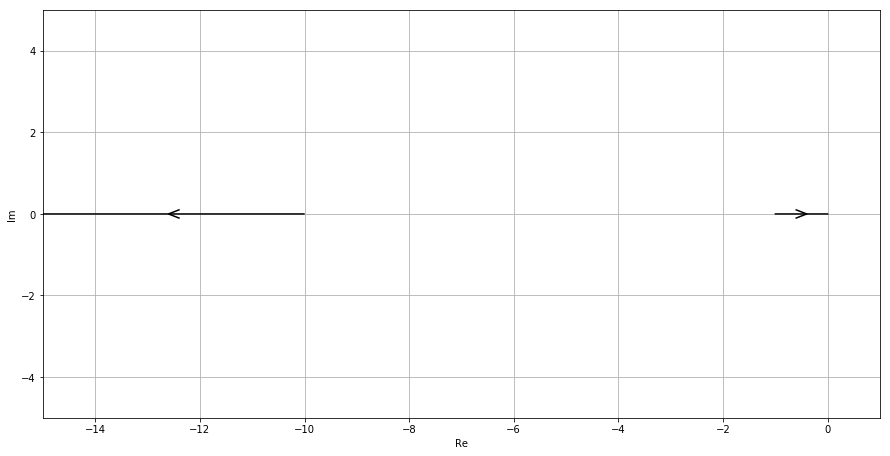

In [6]:
matplotlib.pyplot.figure(figsize=(15, 7.5))
matplotlib.pyplot.plot(lambda1s.real, lambda1s.imag, 'k', 
                       lambda2s.real, lambda2s.imag, 'k', 
                       (-0.6, -0.4, -0.6), (0.1, 0, -0.1), 'k',
                       (-12.4, -12.6, -12.4), (0.1, 0, -0.1), 'k')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.axis([-15, 1, -5, 5])
matplotlib.pyplot.xlabel('Re')
matplotlib.pyplot.ylabel('Im')

matplotlib.pyplot.show()